###### An Array of Sequences

## Overview of Built-In Sequences 

Another way of grouping sequence types (instead of mutability):

*Container sequnces*
    Can hold items of different types, including nested containers, For example: *list, typles, collections.deque*
    
*Flat sequences*
    Hold items of one simple type. For example: *str* and *array.array*

In [1]:
(9.46, 'cat', [2.08, 4.29]) # The tuple has an array of references to its items
# each item is a seperate Python object, possibly holding references to other Python objects

(9.46, 'cat', [2.08, 4.29])

In [2]:
import array
arr = array.array('d', [9.46, 2.08, 4.29, 1]) 
#array of type float (d stands for double which corrensponds to python floats)
arr[0] =1

arr.append(1)
arr


array('d', [1.0, 2.08, 4.29, 1.0, 1.0])

Draw in Excalidraw pg. 23

- A *container sequence* holds references  to the objects it holds, which may be of any type.
- A *flat sequence* stores the value of its contents iin its own memory space, not as **distinct Python object**.

Every Python object in memory has a header with metadata.
Thus, flat sequences are more compact, but they limited to one simple type.

## List Comprehension

A quick way to build a sequence is using a list comprehension (*listcomps*).

Compare those two code snippets:

In [3]:
strings = ['Hello', 'world', 'again', 'bla']

length = []

for word in strings:
    length.append(len(word))
length

[5, 5, 5, 3]

In [4]:
length = [len(word) for word in strings]
length

[5, 5, 5, 3]

A for loop can be used to do many different things: scanning, count or any number of other tasks.
In contrast, a listcomp is more explicit. Its goal is **always** to build a new list.

## Mapping and Filtering with Listcomps 

In [5]:
[word.upper() for word in strings] # Mapping

['HELLO', 'WORLD', 'AGAIN', 'BLA']

Lets look at nested lists:

In [6]:
list_numbers = [[5, 6, 3], [8, 3, 1], [9, 10, 4], [8, 4, 2]]

Lets calculate the sum of each list by mapping each element to its length: 
```list_numbers -->  [14, 12, 23, 14]```

In [7]:
[sum(num) for num in list_numbers]

[14, 12, 23, 14]

In [8]:
length_gt_3 = [len(word) for word in strings if len(word) > 3] # filtering
length_gt_3

[5, 5, 5]

## Cartasian Products

![cartasian_prod](cartasian_prod.png)

In [9]:
A = ['x', 'y', 'z']
B = [1, 2, 3]

def cartasian_prod(A,B):
    result= []
    for item1 in A:
        for item2 in B:
            result.append((item1, item2))
    return result

cartasian_prod(A, B)
            

[('x', 1),
 ('x', 2),
 ('x', 3),
 ('y', 1),
 ('y', 2),
 ('y', 3),
 ('z', 1),
 ('z', 2),
 ('z', 3)]

Now let's do this with listcomps

In [10]:
def cartasian_prod(A, B):
    return[(item1, item2) for item1 in A
                           for item2 in B] 
# This generates a list of tuples arranged by letter,then numbers
    
cartasian_prod(A, B)

[('x', 1),
 ('x', 2),
 ('x', 3),
 ('y', 1),
 ('y', 2),
 ('y', 3),
 ('z', 1),
 ('z', 2),
 ('z', 3)]

In [11]:
def cartasian_prod(A, B):
    return[(item1, item2) for item2 in B
                           for item1 in A] 
# To get the items arranged by numbers, then letters, just rearrange the for clauses
    
cartasian_prod(A, B)

[('x', 1),
 ('y', 1),
 ('z', 1),
 ('x', 2),
 ('y', 2),
 ('z', 2),
 ('x', 3),
 ('y', 3),
 ('z', 3)]

### Building List of Lists



In [12]:
board = [ ['_'] * 3 for i in range(3)] # Create a list of three lists of three items each. Inspect the structure.
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [13]:
board[1][2] = 'X'
board

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

A tempting, but wrong, shortcut: 

In [14]:
weird_board = [ ['_'] * 3] * 3 # The outer list is made of three references to the same inner list.
weird_board[1][2] = 'O' # all rows are aliases referring to the same object, pg. 52
weird_board

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

### list.sort Versus the sort Built-In

The list.*sort* method sorts a list in place. 

In contrast, the built-in function *sorted* creates a new list and returns it. 
It accepts any iterable object as an argument, including immutable sequences and generators. It always returns a newly created list.

Both list.*sort* and *sorted*  take two optional, keyword-only arguments: 

- reverse: accepts a boolean
- key: accepts a one-arguments function 

In [15]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [16]:
sorted(fruits, reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [17]:
sorted(fruits, key=len)

['grape', 'apple', 'banana', 'raspberry']

In [18]:
fruits.sort()
fruits

['apple', 'banana', 'grape', 'raspberry']

In [19]:
books = [('hello', 3), ('world', 1), ('again', 2)]

def sort_helper(item):
    return item[0]

sorted(books, key=sort_helper)

[('again', 2), ('hello', 3), ('world', 1)]

Now let's move on to the other fundamental sequence type in Python: the typle.

## Tuples Are Not Just Immuatable Lists

- used as immuatable lists
- used as records with no field names

### Tuples as Records

Tuples holds records: each item in the tuple holds the data for one field, and the position of the item gves its meaning.

In [20]:
lax_coordinates = (33.9425, -118.408056) # Latitude and Longitude of L.A. Airport

In [21]:
travelers_ids = [('USA', '934234'), ('BRA', '234324'), 
                 ('ESP', '124314')]  #List of tuples

In [22]:
for passport in sorted(travelers_ids): # iterate over sorted tuple  
    print('%s/%s' % passport) 
    # The % formatting operator understands tuples and treats each item as separate field.

BRA/234324
ESP/124314
USA/934234


In [23]:
for country, _ in travelers_ids: 
    print(country) 
    #The for loop knows how to retrieve the items of a tuple separately-this called unpacking

USA
BRA
ESP


## Classic Named Tuples

The collections.namedtuple functions builds a subclass of tuple enhanced with field names.

- Each instance of a class built by namedtuple takes exactly the same amount of memory as a tuple



In [24]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates') #class name and field names
tokyo = City('Tokyo', 'JP', 13600000, (35.689722, 139.691667)) # Field values are passed as seperated positional
#arguments
tokyo

City(name='Tokyo', country='JP', population=13600000, coordinates=(35.689722, 139.691667))

In [25]:
tokyo.population #access the fields by name

13600000

In [26]:
tokyo.coordinates

(35.689722, 139.691667)

In [27]:
tokyo[1] #or access the fields by position

'JP'

In [28]:
tokyo._asdict() # returns a dict built from the named tuple instance

{'name': 'Tokyo',
 'country': 'JP',
 'population': 13600000,
 'coordinates': (35.689722, 139.691667)}

In [29]:
tokyo._replace(name='Berlin') #returns new typle

City(name='Berlin', country='JP', population=13600000, coordinates=(35.689722, 139.691667))

### Tuples as Immutable Lists

Two benefits:

- *Clarity*: you know its length will never change
- *Performance*: A tuple uses less memory than a list of the same length, and it allows Python to do some optimizations.
- fixed length: a tuple instance is allocated the exact memory space it needs.
- in contrast instances of list are allocated with room to spare in case for future appends

**!!!** References in a tuple cannot changed, but if one of those references points to a mutable object, and that object is changed, then the value of the tuple changes.

In [30]:
a = (10, 'alpha', [1, 2])
a[-1].append(99)


## When a List Is Not the Answer

The list type is flexible and easy to use, but depending on specific requirements, there are better options.

For example, if you are constantly adding and removing items from opposite ends of a list, it's good to know that a *deque* (double-ended queue) is a more efficient FIFO (First in, first out) data structure. 

## Deques

The *.append* and *.pop* methods make a list usable as a queue.


![q](queue.png)

But inserting and removing from the head of a list (0-index end) is costly because the entire list must be shifted in memory.

The class *collection.deque* is a queue designed for fast inserting and removing from both ends.

In [31]:
from collections import deque

dq = deque(range(9, 0, -1))
dq

deque([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [32]:
dq.appendleft(10) #appends to the left
dq

deque([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [33]:
dq.pop()# pop only removes the last element
dq

deque([10, 9, 8, 7, 6, 5, 4, 3, 2])

In [34]:

dq = deque(range(10000, 0, -1))
%timeit dq.appendleft(None); dq.pop()

72.4 ns ± 4.42 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [35]:
l = list(range(10000))

%timeit l.append(None); l.pop(0)

1.34 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [36]:
import timeit
N=10000
setup_queue=f"from collections import deque;dq = deque(range({N}, 0, -1))"
fifo_queue = "dq.appendleft(None); dq.pop()"

queue_time= timeit.repeat(setup = setup_queue, 
                     stmt = fifo_queue,
                     repeat = 3,
                     number = 1000)

queue_mean = sum(queue_time) /len(queue_time)


setup_list=f"l = list(range({N}, 0, -1))"
fifo_list = "l.append(None); l.pop(0)"

list_time = timeit.repeat(setup = setup_list, 
                     stmt = fifo_list,
                     repeat = 3,
                     number = 1000)

list_mean = sum(list_time) /len(list_time)

queue_mean, list_mean

(6.995590714116891e-05, 0.002264817710965872)

In [37]:
def time_it(N):
    setup_queue=f"from collections import deque;dq = deque(range({N}, 0, -1))"
    fifo_queue = "dq.appendleft(None); dq.pop()"

    queue_time= timeit.repeat(setup = setup_queue, 
                     stmt = fifo_queue,
                     repeat = 3,
                     number = 1000)

    queue_mean = sum(queue_time) /len(queue_time)


    setup_list=f"l = list(range({N}, 0, -1))"
    fifo_list = "l.append(None); l.pop(0)"

    list_time = timeit.repeat(setup = setup_list, 
                     stmt = fifo_list,
                     repeat = 3,
                     number = 1000)

    list_mean = sum(list_time) /len(list_time)

    return queue_mean, list_mean

In [38]:
x = [10, 100, 1000, 10000, 100000]

for N in x:
    queue_r, list_r = time_it(N)


![](queue_vs_list.png)


Note that deque implements most of the list methods, and adds a few that are specific to its design, like appendleft.
But there is a hidden cost: removing items from the middle of a deque is not as fast.

# Higher Order Functions

- a function that takes a function as an argument

In the functional programming paradigma, some of the best known higher-order functions are map, filter, reduce.

(A listcomp does the job of map and filter combined, but is more readable)

### Map

In [2]:
import math
def exp(x):
    return math.exp(x)

x = [*range(10)]
y = list(map(exp, x))  #Calling map(function, iterable) returns an iterable where each item is the result of 
#calling the first arguement (here. exp) to successive elements of the second argument (an iterable), x.

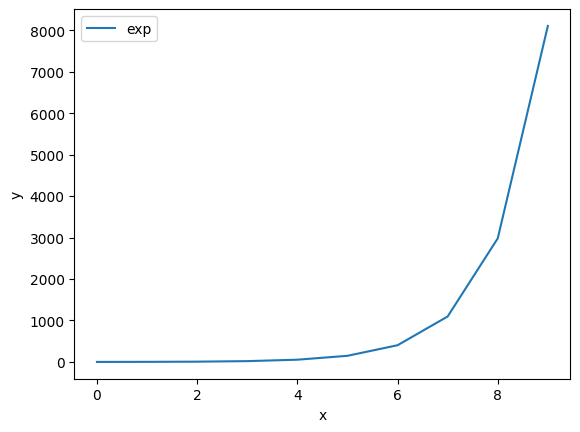

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y, label="exp")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Filter

In [41]:
def filter_helper(item):
    return item % 2

list(filter(filter_helper, range(6)))

[1, 3, 5]

### Map and Filter combined

In [42]:
list(map(exp, filter(filter_helper,range(6))))

[2.718281828459045, 20.085536923187668, 148.4131591025766]

In [43]:
[exp(x) for x in range(6) if x % 2]

[2.718281828459045, 20.085536923187668, 148.4131591025766]

### Reduce

In [44]:
from functools import reduce

def adding(accumulator, currentValue):
    #print(accumulator)
    return accumulator + currentValue

#reduce(adding, range(100), 100) #Initializer
reduce(adding, range(100))  #sum is preferd
sum(range(100))


4950

## Anonymous Functions

The *lambda* keyword creates an anonymous function within a Python expression.

However, the body if a lambda function is limited and statements such as *while, etc* can't be used.

The best use of anonymous functions is in the context of an argument list for a higher-order function.

In [45]:
fruits = ['strawberry', 'fig', 'apple', 'cherry', 'raspberry', 'banana']

def sort_helper(word):
    return word[::-1] #Sorting a list of words by their reversed spelling

sorted(fruits, key=sort_helper)

['banana', 'apple', 'fig', 'raspberry', 'strawberry', 'cherry']

In [46]:
sort_helper = lambda word: word[::-1]

sort_helper

<function __main__.<lambda>(word)>

In [47]:
sorted(fruits, key=sort_helper)

['banana', 'apple', 'fig', 'raspberry', 'strawberry', 'cherry']

In [48]:
sorted(fruits, key=lambda word: word[::-1])

['banana', 'apple', 'fig', 'raspberry', 'strawberry', 'cherry']

Outside the limited context of arguments to higher-order functions, anonymous functions are rarly useful in Python
If a lambda is hard to read, convert the *lambda* to a *def* statement.

The *lambda* syntax is only syntactic sugar.

## Other Function Which Take Iterables As an Argument 

Other reducing built-ins are *all* and *any*

*all(iterable)*

    Returns True if there are no falsy elements in the iterable; all([]) returns True

In [49]:
all([]) 

True

*any(iterable)*

    Returns True if any element of the iterable is truthy; any([]) returns False.

In [50]:
any([['a']])

True

### The Awesome zip

Having a for loop that iterates over items without fiddling with index
variables is great and prevents lots of bugs, but demands some special
utility functions.
One of them is the zip built-in, which makes it easy to
iterate in parallel over two or more iterables by returning tuples that you
can unpack into variables, one for each item in the parallel inputs.

In [51]:
zip(range(3), 'ABC')

In [52]:
list(zip(range(3), 'ABC'))

[(0, 'A'), (1, 'B'), (2, 'C')]

In [53]:
list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3])) #list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3]))

[(0, 'A', 0.0), (1, 'B', 1.1), (2, 'C', 2.2)]

In [54]:
from itertools import zip_longest

'''The itertools.zip_longest function behaves differently: it
uses an optional fillvalue (None by default) to complete
missing values so it can generate tuples until the last iterable is
exhausted.'''
list(zip_longest(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3],
fillvalue=-1))

[(0, 'A', 0.0), (1, 'B', 1.1), (2, 'C', 2.2), (-1, -1, 3.3)]

- zip silently stopping at the shortest iterable
- bad behavior: Silently ignoring part of the input can cause subtle bugs. 
- An optional strict argument to zip to make it behave in that way. It is implemented in Python 3.10.

In [55]:
#list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3], strict=True))

The zip function can also be used to transpose a matrix represented as
nested iterables. For example:



In [56]:
a = [(1, 2, 3),
    (4, 5, 6)]

list(zip(*a))



[(1, 4), (2, 5), (3, 6)]

In [57]:
b = [(1, 2),
     (3, 4),
     (5, 6)]
list(zip(*b))

[(1, 3, 5), (2, 4, 6)]


![](Matrix_transpose.gif)

In [58]:
A = [(1,3,5), 
     (2,4,6)]
list(zip(*A))

[(1, 2), (3, 4), (5, 6)]

### enumerate

*enumerate(iterable, start=0)* Yields 2-tuples of the form (index, item), where index is counter from start, and items is taken from the iterable

In [59]:
list(enumerate('albatroz', 1))#Number the letters in the word, starting from 1.

[(1, 'a'),
 (2, 'l'),
 (3, 'b'),
 (4, 'a'),
 (5, 't'),
 (6, 'r'),
 (7, 'o'),
 (8, 'z')]

## Dictionaries and Sets

### dict Comprehsion

A *dictcomp* builds a dict instance by taking key:value pairs from any iterable.

In [60]:
dial_codes = [
    (880, 'Bangladesh'),
    (55, 'Brazil'),
    (86, 'China'),
    (91, 'India'),
    (62, 'Indonesia'),
    (81, 'Japan'),
    (234, 'Nigeria'),
    (92, 'Pakistan'),
    (7, 'Russia'),
    (1, 'United States'),
]
country_dial = {country: code for code, country in dial_codes} # the iterable dial_codes can be passed directly
#to the dict constructor; key and values are swapped
country_dial

{'Bangladesh': 880,
 'Brazil': 55,
 'China': 86,
 'India': 91,
 'Indonesia': 62,
 'Japan': 81,
 'Nigeria': 234,
 'Pakistan': 92,
 'Russia': 7,
 'United States': 1}

In [61]:
{code: country.upper() for country, code in country_dial.items() if code < 70} #reversing the pairs;
#uppercasing values
# filtering items with code < 70

{55: 'BRAZIL', 62: 'INDONESIA', 7: 'RUSSIA', 1: 'UNITED STATES'}

### Unpacking Mapping

We can apply, ** inside a dict literal:

In [7]:
{'a': 0, **{'x':1}, 'y':2, **{'z':3, 'x': 4}}

{'a': 0, 'x': 4, 'y': 2, 'z': 3}

In this case, duplicate keys are allowed. Later occurrences overwrite previous ones.

This syntax can also be used to merge mappings:

In [8]:
d1 = {'a': 1, 'b': 3}
d2 = {'a': 2, 'b': 4, 'c': 6}

{**d1, **d2}

{'a': 2, 'b': 4, 'c': 6}

In [9]:
import sys
sys.version

'3.10.8 (main, Oct 12 2022, 19:14:26) [GCC 9.4.0]'

### Merging Mappings with | (since python3.9)

Python 3.9 supports using | and |= to merge mappings. 

In [109]:
d1 | d2 

{'a': 2, 'b': 4, 'c': 6}

To update an existing mapping in place, use |=. 

In [11]:
d1


{'a': 1, 'b': 3}

In [12]:
d1 |= d2

In [13]:
d1

{'a': 2, 'b': 4, 'c': 6}

### Inserting or Updating Mutable Values

Dictionary accessed with d[k] raises an error when k is nt an existing key. 
d.get(k, default) avoids handling the KeyError.

In [14]:
d1

{'a': 2, 'b': 4, 'c': 6}

In [15]:
d1['a']

2

In [110]:
d1['d']

KeyError: 'd'

In [18]:
d1.get('bl', 'Hello world')

'Hello world'

In [36]:

zen_python = '''Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!'''

import re

words = re.findall('\w+', zen_python)

dict_index = {}
for index, word in enumerate(words):
    ocurrences = dict_index.get(word, []) #get a list if a word was not found
    ocurrences.append(index) #append new index to occurences
    dict_index[word] = ocurrences #Put  changed occurences into dict_index; thus entails a second search through the index.
    
for word in [*dict_index][:3]:
    print(word, dict_index[word])


Beautiful [0]
is [1, 6, 11, 16, 21, 26, 91, 97, 106, 118]
better [2, 7, 12, 17, 22, 27, 92, 99]


In [37]:
dict_index = {}
for index, word in enumerate(words):
      dict_index.setdefault(word, []).append(index) #Get the list of occurences for word or set it to [] if not found.
        #setdefault returns the value, so it can be updated without requiring a second search

for word in [*dict_index][:3]:
    print(word, dict_index[word])


Beautiful [0]
is [1, 6, 11, 16, 21, 26, 91, 97, 106, 118]
better [2, 7, 12, 17, 22, 27, 92, 99]


In other words 

In [ ]:
my_dict.setdefault(key, []).append(new_value)

is the same as

In [ ]:
if key not in my_dict:
    my_dict(key) = []
my_dict[key].append(new_value)

except that the latter code performs at least two searches for key - three if it's not found - while setdefault does it all with a single lookup.

## Automatic Handling of Missing Keys

### collections.defaultdict(list)

A collections.defaultdict instance creates items with a default value
on demand whenever a missing key is searched using d[k] syntax.


In [45]:
import re
import collections

words = re.findall('\w+', zen_python)

dict_index = collections.defaultdict(list) #Create a defaultdict with function
for index, word in enumerate(words):
    dict_index[word].append(index)  #If word is not initially in the index, the function is called to fill the missing values
#produce the missing value
    
for word in [*dict_index][:3]:
    print(word, dict_index[word])

Beautiful [0]
is [1, 6, 11, 16, 21, 26, 91, 97, 106, 118]
better [2, 7, 12, 17, 22, 27, 92, 99]


In [46]:
def fill_missings():
    return 'BLA'
my_dict = collections.defaultdict(fill_missings) 
my_dict['Hi']

'BLA'

## Other Variations of dict

### collections.OrderedDict
Since Python 3.6 the built-in dict keeps the keys ordered. The most common reason to use OrderedDict is writing code that is backward compatible with earlier Python versions.

Differences:

- The equality operation for OrderedDict checks for matching order.


In [70]:
d1 = {'a':1, 'b':2}
d2 = dict(list(d1.items())[::-1])
d1 == d2
d1, d2

({'a': 1, 'b': 2}, {'b': 2, 'a': 1})

In [71]:
d1 = collections.OrderedDict(d1)
d2 = collections.OrderedDict(d2)

d1 == d2
d1, d2

(OrderedDict([('a', 1), ('b', 2)]), OrderedDict([('b', 2), ('a', 1)]))

- OrderedDict has a move_to_end() method to efficiently reposition an element to an endpoint.

In [75]:
d1.move_to_end('a')
d1
d1 == d2

True

### collections.ChainMap

A ChainMap instance holds a list of mappings that can be searched as one. The
lookup is performed on each input mapping in the order it appears in the
constructor call, and succeeds as soon as the key is found in one of those
mappings. For example:

In [157]:
d1 = dict(a=1, b=3)
d2 = dict(a=2, b=4, c=6)
from collections import ChainMap
chain = ChainMap(d1, d2)
chain['a']
chain

ChainMap({'a': 1, 'b': 3}, {'a': 2, 'b': 4, 'c': 6})

In [77]:
chain['c'] #Lookups search the underlying mappings successively until a key is found. 

6

In [78]:
chain['b'] #lookup is performed on each input mapping in the order it appears in the
#constructor call


3

The ChainMap instance does not copy the input mappings, but holds references
to them. Updates or insertions to a ChainMap only affect the first input
mapping.

In [82]:
chain['c'] = -1 
d1

{'a': 1, 'b': 3, 'c': -1}

In [83]:
d2

{'a': 2, 'b': 4, 'c': 6}

In [161]:
chain

ChainMap({'a': 1, 'b': 3}, {'a': 2, 'b': 4, 'c': 6})

In [165]:
child_chain = chain.new_child()
chain

ChainMap({'a': 1, 'b': 3}, {'a': 2, 'b': 4, 'c': 6})

In [170]:
child_chain['bla'] = '11'
child_chain
chain.maps

[{'a': 1, 'b': 3}, {'a': 2, 'b': 4, 'c': 6}]

In [173]:
chain.parents

ChainMap({'a': 2, 'b': 4, 'c': 6})

Use cases:
- Searching through multiple dictionaries
- providing a chain of default values

### Simulating Pythons lookup

In [160]:
import builtins
from collections import ChainMap

pylookup = ChainMap(locals(), globals(), vars(builtins))

print(pylookup['sum'])
sum = 0
print(pylookup['sum'])


<built-in function sum>
0


### collections.Counter

A mapping that holds an integer count for each key. Updating an existing key
adds to its count.

In [90]:
ct = collections.Counter('abracadabra')
ct

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})

In [92]:
ct.update('aaaaazzz')
ct

Counter({'a': 15, 'b': 2, 'r': 2, 'c': 1, 'd': 1, 'z': 6})

In [93]:
ct.most_common(3) #most_common([n]) returns an ordered list of tuples with the n most
#common items and their counts;

[('a', 15), ('z', 6), ('b', 2)]

In [150]:
subjects = [
      {'name': 'English', 'grade': 'A'},
      {'name': 'German', 'grade': 'C'},
      {'name': 'Maths', 'grade': 'B'}
    ]

ct2 = collections.Counter()
#[list(d.values()).count('B') for d in subjects]
#[ct2.update(d['grade']) for d in subjects]
for subject in subjects:
    ct2.update(subject['grade'])
ct2

Counter({'A': 1, 'C': 1, 'B': 1})

In [152]:
subjects= [
      {'name': 'English', 'grade': 'A'},
      {'name': 'German', 'grade': 'F'},
      {'name': 'Maths', 'grade': 'F'}
    ]

ct2 = collections.Counter()
for subject in subjects:
    ct2.update(subject['grade'])
ct2['F']

2

In [154]:
grades = [subject['grade'] for subject in subjects]
print(grades)
#print(grades.count('F'))
ct2 = collections.Counter(grades)
ct2


['A', 'F', 'F']
2


Counter({'A': 1, 'F': 2})

### Dictionary Views

The dict instance methods .keys(), .values(), and .items() return
instances of classes called dict_keys, dict_values, and dict_items.

- These dictionary views are read-only

In [102]:
d = dict(a=10, b=20, c=30)
values = d.values()

In [103]:
len(values) #We can query the len of a view.

3

In [104]:
list(values) #Views are iterable, so it’s easy to create lists from them.

[10, 20, 30]

If the source dict is updated, you can
immediately see the changes through an existing view.

In [105]:
d['z'] = 99
d

{'a': 10, 'b': 20, 'c': 30, 'z': 99}

In [106]:
values

dict_values([10, 20, 30, 99])

# Set Theory

- set is mutable
- frozenset immutable

A set is a collection of unique objects. A basic use case is removing duplication:

In [174]:
l = ['spam', 'spam', 'eggs', 'spam', 'bacon', 'eggs']
set(l)

{'bacon', 'eggs', 'spam'}

In [175]:
list(set(l))

['eggs', 'spam', 'bacon']

Set elements must be hashable.

### What is Hashable
- an object that has a hash code which never changes during its lifetime and can be compared to other objects
- Hashable objects which compare equal must have the same hash code

- Numeric types and flat immutable types str are all hashable.
- Container types are hashable if they are immutable and all contained objects are also hashable.
- A frozenset is always hashable
- A tuple is hashable only if all itsitems are hashable. 



In [192]:
tt = (1, 2, (30, 40))


In [193]:
hash(tt)

-3907003130834322577

In [194]:
tl = (1, 2, [30, 40])
hash(tl)

TypeError: unhashable type: 'list'

In [191]:
hash(set())

TypeError: unhashable type: 'set'

In [198]:
x = 1.001
hash(x)

2305843009213441

In [201]:
hash(1.002)

4611686018427393

- The hash code of an object may be different depending on the version of Python, the machine architecture.
- The hash code of a correctly implemented object is guaranteed to be constant only within one Python process.

In [203]:
s = {1.0, 2.0, 3.0}
s.add(1)
s

{1.0, 2.0, 3.0}

- Adding elements to a set may change the order of existing elements

In Python 3, the standard string representation of sets always uses the {…}
notation, except for the empty set:

In [177]:
s = {1}
type(s)

set

In [178]:
s

{1}

In [179]:
s.pop()

1

In [180]:
s

set()

There is no special syntax to represent frozenset literals—they must be
created by calling the constructor. 

In [181]:
frozenset(range(10))

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

## Set Comprehensions



In [188]:
l = ['spam', 'spam', 'eggs', 'spam', 'bacon', 'eggs']

{item for item in l} # The order of the output changes for each Python process

{'bacon', 'eggs', 'spam'}

## Set Operations

the set types implement many set operations. Given two sets a and b:
- Union:   a | b
- Intersection: a & b
- Difference: a - b
- symmetric difference: a ^ b

Smart use of set operations can reduce both the line count and the
execution time of Python programs, at the same time making code easier to read
and reason about—by removing loops and conditional logic.

### Union

- $ A  \cup B = \{ x: x \in A \text{  or  } x \in B\}$

|Math symbol | Python operation | Method|
| :----: | :---: | :----:|
| $ A  \cup B $ | $ a \vert b $ | a.__ or__(b)
| | | s.union(iterable,...) | 

![](union.png)


In [216]:
A = {1, 3, 5, 7}
B = {1, 2, 4, 6, 7}
A | B

{1, 2, 3, 4, 5, 6, 7}

In [217]:
A.__or__(B)

{1, 2, 3, 4, 5, 6, 7}

In [218]:
A.union([1,2,4,6,7])

{1, 2, 3, 4, 5, 6, 7}

### Intersection 

- ${\displaystyle A\cap B=\{x:x\in A{\text{  and  }}x\in B\}}$

|Math symbol | Python operation | Method|
| :----: | :---: | :----:|
| $ \displaystyle A\cap B$ | a & b | a.__ and__(b) 
| | |s.intersection(iterable,...)| 

![](intersection.png)

In [212]:
A = {1,2,5,7}
B = {1,2,4,6}
A & B 

{1, 2}

In [213]:
A.__and__(B)  

{1, 2}

In [215]:
A.intersection([1,2,4,6])

{1, 2}

In [210]:
A = {x for x in range(20) if x % 2 == 0} # even integer
B = {x for x in range(20) if x % 3 == 0} # divisible
A & B

{0, 6, 12, 18}

### Difference

- $ {\displaystyle B\setminus A=\{x\in B:x\notin A\}.} $

|Math symbol | Python operation | Method|
| :----: | :---: | :----:|
| $ B\setminus A $ | $ b - a $ | b.__ sub__(a)
| | |b.difference(iterable,...)| 

![](difference.png)

In [219]:
A = {1,2,3}
B = {2,3,4}

B - A

{4}

In [220]:
A - B

{1}

### Symmetric Difference

- $ {\displaystyle A\,\triangle \,B=\left(A\setminus B\right)\cup \left(B\setminus A\right)} $

|Math symbol | Python operation | Method|
| :----: | :---: | :----:|
| $ A\,\triangle \,B $ |  a ^ b  | a.__ xor__(b)
| | |a.symmetric_differnce(iterable,...)| 

![](symmetric_diff.png)

In [221]:
A = {1,2,3}
B = {3,4}

A ^ B

{1, 2, 4}

### Further operations

| Python code | Description
| :--- | :---- |
| a.isdisjoint(b) | a and b are disjoint (no elements in common)
| a in b | Element a is member of b
| a <= b | a is subset of b
| a < b | a is proper subset of b
| a >= b | a is superset of b
| a > b | a is proper superset of b

## Set operations on dict Views

you can use set operations on dict views

In [227]:
d1 = {'a':1, 'b': 2, 'c':3, 'd':4}
d2 = {'b':2, 'd':40, 'e':50}

d1.keys() & d2.keys()

{'b', 'd'}

In [234]:
d3 = {'a':1}
d1.keys() > d3.keys()

True

In [236]:
d4 = {'e': 1}
d1.keys().isdisjoint(d4.keys())

True

In [229]:
result = d1.items() & d2.items()
result

{('b', 2)}

In [230]:
type(result)

set

In [231]:
s = { 'a', 'e', 'i'}

d1.keys() & s #The set operators in dictionary views are compatible with set instances

{'a'}

In [232]:
d1.keys() | s

{'a', 'b', 'c', 'd', 'e', 'i'}

- A dict_items view only works as a set if all values in the dict are hashable.
- On the other hand, a dict_keys view can always be used as a set, because every key is hashable—by definition.

### Needle in a Haystack

In [274]:
import time

def time_factory(rounds=3):
    def timer(func):
        def wrapper_timer(*args, **kwargs):
            results = []
            for i in range(rounds):
                start = time.time()
                value = func(*args, **kwargs)
                elapsed_time = time.time() - start
                results.append(elapsed_time)
                print(f"Elapsed time: {elapsed_time:0.5f} seconds")
            return value, sum(results) /len(results)
        return wrapper_timer
    return timer

In [275]:
@time_factory()
def union_set(needles, haystack):
    return len(needles &  haystack)

In [290]:
import random
factor = 10_000_000
N = factor - 500
needles = list(range(1000))
random.shuffle(needles)
haystack = list(range(1000, N + 500))
haystack = [*haystack, *needles[:500]]
random.shuffle(haystack)



In [291]:
union_set(set(needles), set(haystack))

Elapsed time: 0.00008 seconds
Elapsed time: 0.00006 seconds
Elapsed time: 0.00005 seconds


(500, 6.302197774251302e-05)

In [279]:
@time_factory()
def union_list(needles, haystack):
    found = 0
    for n in needles:
        if n in haystack:
            found += 1
    return found

In [292]:
union_list(needles, haystack)

Elapsed time: 451.82488 seconds
Elapsed time: 447.75300 seconds
Elapsed time: 445.99019 seconds


(500, 448.52268799146015)